<a href="https://colab.research.google.com/github/MarinaSokolova111/OPDA/blob/main/%D0%9E%D0%9F%D0%94%D0%90_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_23_04_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Алгоритм который рассчитывает вероятность выпадения орла или решки

In [ ]:
import random 
def coin_trial(): 
    heads = 0 
    for i in range(100): 
        if random.random() <= 0.5: 
            heads +=1
    return heads
def simulate(n): 
    trials = []
    for i in range(n): 
        trials.append(coin_trial()) 
    return(sum(trials)/n)

In [ ]:
simulate(10)

49.4

In [ ]:
simulate(100)

50.18

In [ ]:
simulate(1000)

49.845

In [ ]:
simulate(1000000)

49.998728

#Пример 1


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving state.csv to state.csv


In [ ]:
import math
import statistics
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
state = pd.read_csv('state.csv')
print(state)
print(state['Population'].mean())
print(stats.trim_mean(state['Population'], 0.1))
print(state['Population'].median())

             State  Population  Murder.Rate Abbreviation
0          Alabama     4779736          5.7           AL
1           Alaska      710231          5.6           AK
2          Arizona     6392017          4.7           AZ
3         Arkansas     2915918          5.6           AR
4       California    37253956          4.4           CA
5         Colorado     5029196          2.8           CO
6      Connecticut     3574097          2.4           CT
7         Delaware      897934          5.8           DE
8          Florida    18801310          5.8           FL
9          Georgia     9687653          5.7           GA
10          Hawaii     1360301          1.8           HI
11           Idaho     1567582          2.0           ID
12        Illinois    12830632          5.3           IL
13         Indiana     6483802          5.0           IN
14            Iowa     3046355          1.9           IA
15          Kansas     2853118          3.1           KS
16        Kentucky     4339367 

#Пример 2
Средневзвешенное значение. 

In [ ]:
!pip install wquantiles

  Created wheel for wquantiles: filename=wquantiles-0.5-cp37-none-any.whl size=2509 sha256=c4512726e63e488c998c5f7d3c51e38795de17e1d2f89140c02a55c53e891162
  Stored in directory: /root/.cache/pip/wheels/24/61/20/f9e1b00d1697d793c1b423cecbdb40fc65dd29a6188e78af41
Successfully built wquantiles


In [ ]:
from wquantiles import *
import weighted

In [ ]:
print(np.average(state['Murder.Rate'], weights=state['Population']))
print(weighted.median(state['Murder.Rate'], weights=state['Population']))

4.445833981123393
4.4


In [ ]:
from statsmodels.robust.scale import mad

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print(state['Population'].std())
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))
print(mad(state['Population']))

6848235.347401142
4847308.0
3849876.1459979336


#Пример 3


In [ ]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

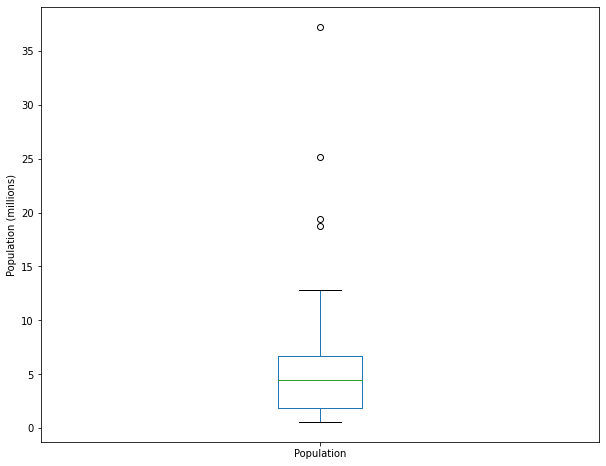

In [ ]:
plt.figure(figsize=(10,8))
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

# Пример 4

In [ ]:
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64


Text(0, 0.5, 'Population (millions)')

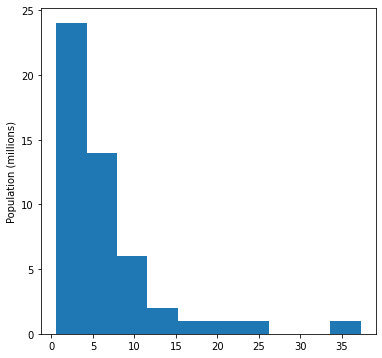

In [ ]:
ax = (state['Population']/1_000_000).plot.hist(figsize=(6,6))
ax.set_ylabel('Population (millions)')

Text(0.5, 0, 'Murder Rate (per 100,000)')

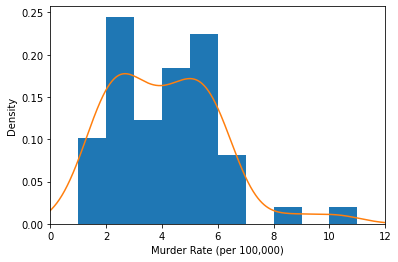

In [ ]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

# Пример 5
dfw_airline.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dfw_airline.csv to dfw_airline.csv


In [ ]:
dfw = pd.read_csv('dfw_airline.csv')
print(100 *dfw/dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


Text(0, 0.5, 'Count')

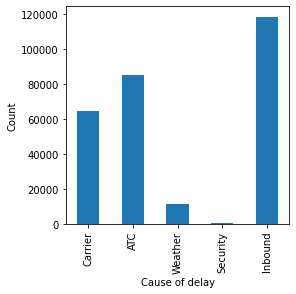

In [ ]:
ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

# Пример 6

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sp500_data.csv to sp500_data.csv
Saving sp500_sectors.csv to sp500_sectors.csv


In [ ]:
sp500_sym=pd.read_csv('sp500_sectors.csv')
sp500_px = pd.read_csv('sp500_data.csv',index_col=0)

telecomSymbols=sp500_sym[sp500_sym['sector']=='telecommunications_services']['symbol']
telecom=sp500_px.loc[sp500_px.index >= '2012-07-01',telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


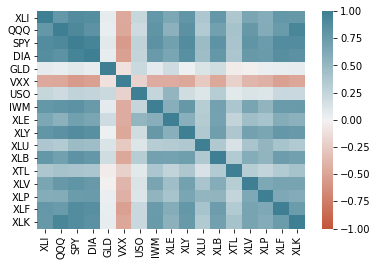

In [ ]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector']=='etf']['symbol']]
sns.heatmap(etfs.corr(), vmin = -1, vmax = 1,
            cmap = sns.diverging_palette(20,220, as_cmap = True))

#30.01.2021

---



---



# Пример 7

In [ ]:
import scipy.stats as stats
n,r,p=8,3,0.6
stats.binom.pmf(r,n,p)

0.12386304000000009

In [ ]:
import scipy.stats as stats
d=2
r=3
stats.poisson.pmf(r,d)

0.18044704431548356

In [ ]:
import scipy.stats as stats
d=2
r=2
1 - stats.poisson.cdf(r,d)

0.3233235838169366